In [1]:

import cv2
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn #파이토치에있는 딥러닝레이어만들때 쓰는모듈
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
os.environ['KMP_DUPLICATE_LIB_OK']='True'

real_seed = 42
np.random.seed(real_seed)
tf.random.set_seed(real_seed)
torch.manual_seed(real_seed)
random.seed(real_seed)

In [2]:
import os
from PIL import Image


train_normal="C:/Users/chunjae/Downloads/Tire_Textures/training_data/normal"
train_crack="C:/Users/chunjae/Downloads/Tire_Textures/training_data/cracked"
test_normal="C:/Users/chunjae/Downloads/Tire_Textures/testing_data/normal"
test_crack="C:/Users/chunjae/Downloads/Tire_Textures/testing_data/cracked"

train_n = os.listdir(train_normal)
train_c = os.listdir(train_crack)
test_n = os.listdir(test_normal)
test_c = os.listdir(test_crack)


train_n_files = [f for f in train_n if f.endswith(('jpg', 'jpeg', 'png'))]
train_c_files = [f for f in train_c if f.endswith(('jpg', 'jpeg', 'png'))]
test_n_files = [f for f in test_n if f.endswith(('jpg', 'jpeg', 'png'))]
test_c_files = [f for f in test_c if f.endswith(('jpg', 'jpeg', 'png'))]

In [3]:
def resize_and_convert_to_grayscale(file_list, directory, target_size=(128,128)):
    resized_images = []
    for image_file in file_list:
        image_path = '/'.join([directory, image_file])
        img = cv2.imread(image_path)
        if img is not None:
            # 이미지 크기 조정
            img_resized = cv2.resize(img, target_size)
            # 이미지를 흑백으로 변환
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            # 변환된 이미지를 다시 저장
            cv2.imwrite(image_path, img_gray)
            resized_images.append((image_file, img_gray))
            # 좌우 반전
            img_flip_lr = cv2.flip(img_gray, 1)
            cv2.imwrite(os.path.join(directory, f"flipped_lr_{image_file}"), img_flip_lr)
            resized_images.append((f"flipped_lr_{image_file}", img_flip_lr))
            # 상하 반전
            img_flip_ud = cv2.flip(img_gray, 0)
            cv2.imwrite(os.path.join(directory, f"flipped_ud_{image_file}"), img_flip_ud)
            resized_images.append((f"flipped_ud_{image_file}", img_flip_ud))
            # 상하 좌우 반전
            img_flip_both = cv2.flip(img_gray, -1)
            cv2.imwrite(os.path.join(directory, f"flipped_both_{image_file}"), img_flip_both)
            resized_images.append((f"flipped_both_{image_file}", img_flip_both))
             # 90도 회전
            rows, cols = img_gray.shape
            M2 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
            rotated_img2 = cv2.warpAffine(img_gray, M2, (cols, rows))
            cv2.imwrite(os.path.join(directory, f"rotated_90_{image_file}"), rotated_img2)
            resized_images.append((f"rotated_90_{image_file}", rotated_img2))
            # 90도 회전 후 좌우 반전
            rotated_flip_lr = cv2.flip(rotated_img2, 1)
            cv2.imwrite(os.path.join(directory, f"rotated_90_flipped_lr_{image_file}"), rotated_flip_lr)
            resized_images.append((f"rotated_90_flipped_lr_{image_file}", rotated_flip_lr))
            # 90도 회전 후 상하 반전
            rotated_flip_ud = cv2.flip(rotated_img2, 0)
            cv2.imwrite(os.path.join(directory, f"rotated_90_flipped_ud_{image_file}"), rotated_flip_ud)
            resized_images.append((f"rotated_90_flipped_ud_{image_file}", rotated_flip_ud))
            # 90도 회전 후 상하 좌우 반전
            rotated_flip_both = cv2.flip(rotated_img2, -1)
            cv2.imwrite(os.path.join(directory, f"rotated_90_flipped_both_{image_file}"), rotated_flip_both)
            resized_images.append((f"rotated_90_flipped_both_{image_file}", rotated_flip_both))
        else:
            print(f"Failed to read {image_path}")
    return resized_images
# 각 데이터셋의 이미지 크기 조정 및 흑백으로 변환
resized_train_normal_images = resize_and_convert_to_grayscale(train_n_files, train_normal)
resized_train_crack_images = resize_and_convert_to_grayscale(train_c_files, train_crack)
resized_test_normal_images = resize_and_convert_to_grayscale(test_n_files, test_normal)
resized_test_crack_images = resize_and_convert_to_grayscale(test_c_files, test_crack)

# import random
# def display_random_image(images):
#     image_file, img = random.choice(images)
#     cv2.imshow(image_file, img)
#     os.environ['KMP_DUPLICATE_LIB_OK']='True'
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# print("Displaying a Random Resized and Converted Train Normal Image...")
# display_random_image(resized_train_normal_images)
# print("Displaying a Random Resized and Converted Train Crack Image...")
# display_random_image(resized_train_crack_images)
# print("Displaying a Random Resized and Converted Test Normal Image...")
# display_random_image(resized_test_normal_images)
# print("Displaying a Random Resized and Converted Test Crack Image...")
# display_random_image(resized_test_crack_images)



In [4]:
# import random
# def display_random_image(images):
#     image_file, img = random.choice(images)
#     cv2.imshow(image_file, img)
#     os.environ['KMP_DUPLICATE_LIB_OK']='True'
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# print("Displaying a Random Resized and Converted Train Normal Image...")
# display_random_image(resized_train_normal_images)
# print("Displaying a Random Resized and Converted Train Crack Image...")
# display_random_image(resized_train_crack_images)
# print("Displaying a Random Resized and Converted Test Normal Image...")
# display_random_image(resized_test_normal_images)
# print("Displaying a Random Resized and Converted Test Crack Image...")
# display_random_image(resized_test_crack_images)

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
# 데이터 준비
train_images = []
train_labels = []
# 손상되지 않은 타이어 이미지
for image_file, img in resized_train_normal_images:
    train_images.append(img)
    train_labels.append(0)  # 손상되지 않은 타이어: 0
# 손상된 타이어 이미지
for image_file, img in resized_train_crack_images:
    train_images.append(img)
    train_labels.append(1)  # 손상된 타이어: 1
train_images = np.array(train_images)
train_labels = np.array(train_labels)
# train_images = train_images / 255.0


###################
#테스트도 똑같이

# 데이터 준비
test_images = []
test_labels = []
# 손상되지 않은 타이어 이미지
for image_file, img in resized_test_normal_images:
    test_images.append(img)
    test_labels.append(0)  # 손상되지 않은 타이어: 0
# 손상된 타이어 이미지
for image_file, img in resized_test_crack_images:
    test_images.append(img)
    test_labels.append(1)  # 손상된 타이어: 1
test_images = np.array(test_images)
test_labels = np.array(test_labels)
# test_images = test_images / 255.0

In [6]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

5624
5624
2600
2600


In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32, 32, 1),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)       

In [8]:
# from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.00005), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # 손실 함수로 ‘binary_crossentropy’ 사용
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

In [9]:
from keras.callbacks import Callback

class CombinedCallback(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.train_losses = []
        self.train_accuracies = []
        self.test_losses = []
        self.test_accuracies = []
        
    def on_epoch_end(self, epoch, logs=None):
        # 트레이닝 성능 저장
        self.train_losses.append(logs['loss'])
        self.train_accuracies.append(logs['accuracy'])
        
        # 테스트 세트 평가 및 성능 저장
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.test_losses.append(loss)
        self.test_accuracies.append(acc)
        
        print(f'\n에포크 {epoch+1} - 트레이닝 손실: {logs["loss"]}, 정확도: {logs["accuracy"]}, 테스트 손실: {loss}, 테스트 정확도: {acc}')

# custom callback
callbacks = CombinedCallback((test_images,test_labels))

model.fit(train_images, np.array(train_labels), epochs=13, batch_size=256, callbacks=callbacks)

Epoch 1/13




22/22 [==============================] - ETA: 0s - loss: 13.7005 - accuracy: 0.4940
에포크 1 - 트레이닝 손실: 13.700484275817871, 정확도: 0.49395447969436646, 테스트 손실: 3.0412368774414062, 테스트 정확도: 0.6526923179626465
22/22 [==============================] - 8s 299ms/step - loss: 13.7005 - accuracy: 0.4940
Epoch 2/13
22/22 [==============================] - ETA: 0s - loss: 5.9170 - accuracy: 0.5004
에포크 2 - 트레이닝 손실: 5.9169921875, 정확도: 0.50035560131073, 테스트 손실: 4.239110946655273, 테스트 정확도: 0.6499999761581421
22/22 [==============================] - 6s 258ms/step - loss: 5.9170 - accuracy: 0.5004
Epoch 3/13
22/22 [==============================] - ETA: 0s - loss: 4.4574 - accuracy: 0.5112
에포크 3 - 트레이닝 손실: 4.457408905029297, 정확도: 0.5112019777297974, 테스트 손실: 2.114623546600342, 테스트 정확도: 0.6596153974533081
22/22 [==============================] - 6s 273ms/step - loss: 4.4574 - accuracy: 0.5112
Epoch 4/13
22/22 [==============================] - ETA: 0s - loss: 3.5591 - accuracy: 0.5192
에포크 4 - 트레이닝 손실: 3.5

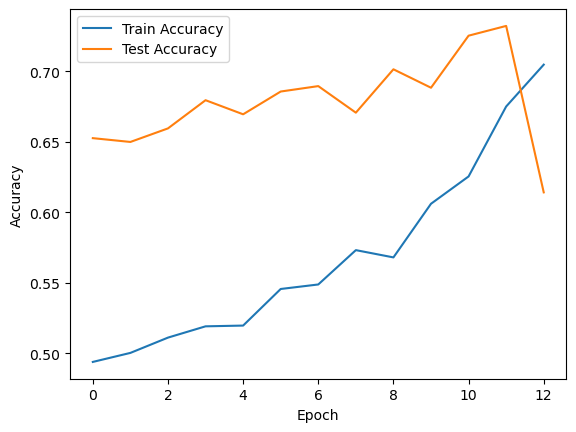

In [10]:
import matplotlib.pyplot as plt

# Train accuracies와 test accuracies를 그래프로 표시

plt.plot(range(len(callbacks.train_accuracies)), callbacks.train_accuracies, label='Train Accuracy')
plt.plot(range(len(callbacks.test_accuracies)), callbacks.test_accuracies, label='Test Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

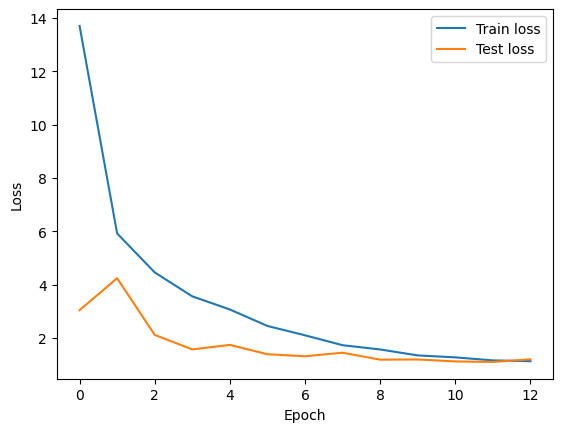

In [11]:
plt.plot(range(len(callbacks.train_accuracies)), callbacks.train_losses, label='Train loss')
plt.plot(range(len(callbacks.test_accuracies)), callbacks.test_losses, label='Test loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model